# **Parte I: Limpieza de la base**

In [1]:
directorio = r"C:\Users\User\Downloads\Big data - TP2"
archivo_csv = "Base Airbnb NY.csv"

In [2]:
import os
import pandas as pd

In [3]:
ruta_absoluta = os.path.join(directorio, archivo_csv)
data_frame = pd.read_csv(ruta_absoluta)
data_frame = pd.read_csv(ruta_absoluta)  # Cargar el DataFrame original desde el archivo CSV


In [4]:
#1. 
#a. Tengan en cuenta si hay valores duplicados y eliminenlos.
print("Ejercicio a")
cant_valores_DF = len(data_frame) #para saber cuantos valores repetidos hay miramos la cantidad de valores previo a elimiar los repetidos.(Co DF nos referimos a Data Frame)
print("Cantidad de Valores con duplicados:", cant_valores_DF)

DF_sin_duplicados = data_frame.drop_duplicates() #eliminnamos las filas con valores duplicados
cant_valores_sin_duplicados = len(DF_sin_duplicados)
print("Cantidad de Valores sin los duplicados:", cant_valores_sin_duplicados) #volvemos a mirar la canntidad de valores en el DF.

print("Cantidad de Valores duplicados:", cant_valores_DF-cant_valores_sin_duplicados) #para saber cuantos duplicados hay hacemos: "Cantidad de Valores con duplicados" - "Cantidad de Valores sin los duplicados"

#b. Eliminen las columnas que no tienen informacion de interes.
print("Ejercicio b")
num_columnas = data_frame.shape[1]
print("Número de columnas:", num_columnas)
print(data_frame.head())
print(data_frame.columns)
columnas_a_eliminar = ['host_name', 'name'] #eliminamos estas columnas porque no nos parece relevantes para el analisis
data_frame = data_frame.drop(columns=columnas_a_eliminar)

Ejercicio a
Cantidad de Valores con duplicados: 48905
Cantidad de Valores sin los duplicados: 48895
Cantidad de Valores duplicados: 10
Ejercicio b
Número de columnas: 16
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Ha

In [5]:
#e. Transformen las variables ‘neighbourhood group’ y ‘room type’ a variables numericas. 
print("Ejercicio e")
frecuencia_valores_roomt = data_frame['room_type'].value_counts()
print("Frecuencia de cada valor:")
print(frecuencia_valores_roomt)
print(data_frame)

frecuencia_valores = data_frame['neighbourhood_group'].value_counts()
print("Frecuencia de cada valor único:")
print(frecuencia_valores)

# Diccionario de mapeo 'neighbourhood_group'
neighbourhood_group_mapping = {'Manhattan': 1, 'Brooklyn': 2, 'Queens': 3, 'Staten Island': 4, 'Bronx': 5}
# Diccionario de mapeo para 'room_type'
room_type_mapping = {'Entire home/apt': 1, 'Private room': 2, 'Shared room': 3}

# Asignar valores numéricos a las columnas
data_frame['neighbourhood_group_numeric'] = data_frame['neighbourhood_group'].map(neighbourhood_group_mapping)
data_frame['room_type_numeric'] = data_frame['room_type'].map(room_type_mapping)

# Mostrar el DataFrame con las nuevas variables numéricas
print(data_frame.head())

#f. Con la ayuda de los comandos groupby y join o merge, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna offer group.
print("Ejercicio f")
offer_group = data_frame.groupby('neighbourhood_group').size().reset_index(name='offer_group')
# Unimos el resultado al DataFrame original
data_frame = data_frame.merge(offer_group, on='neighbourhood_group', how='left')
# Mostrar las primeras filas del DataFrame con la nueva columna 'offer_group'
print(data_frame.head())

Ejercicio e
Frecuencia de cada valor:
room_type
Entire home/apt    25414
Private room       22331
Shared room         1160
Name: count, dtype: int64
             id   host_id neighbourhood_group              neighbourhood  \
0          2539      2787            Brooklyn                 Kensington   
1          2595      2845           Manhattan                    Midtown   
2          3647      4632           Manhattan                     Harlem   
3          3831      4869            Brooklyn               Clinton Hill   
4          5022      7192           Manhattan                East Harlem   
...         ...       ...                 ...                        ...   
48900  19454344  11670284           Manhattan            Upper East Side   
48901  36224876  46232598           Manhattan            Upper East Side   
48902  21869051  97243693           Manhattan                Murray Hill   
48903   3004563  15303460            Brooklyn  Prospect-Lefferts Gardens   
48904  19712687

# **Parte II: Graficos y visualizaciones**

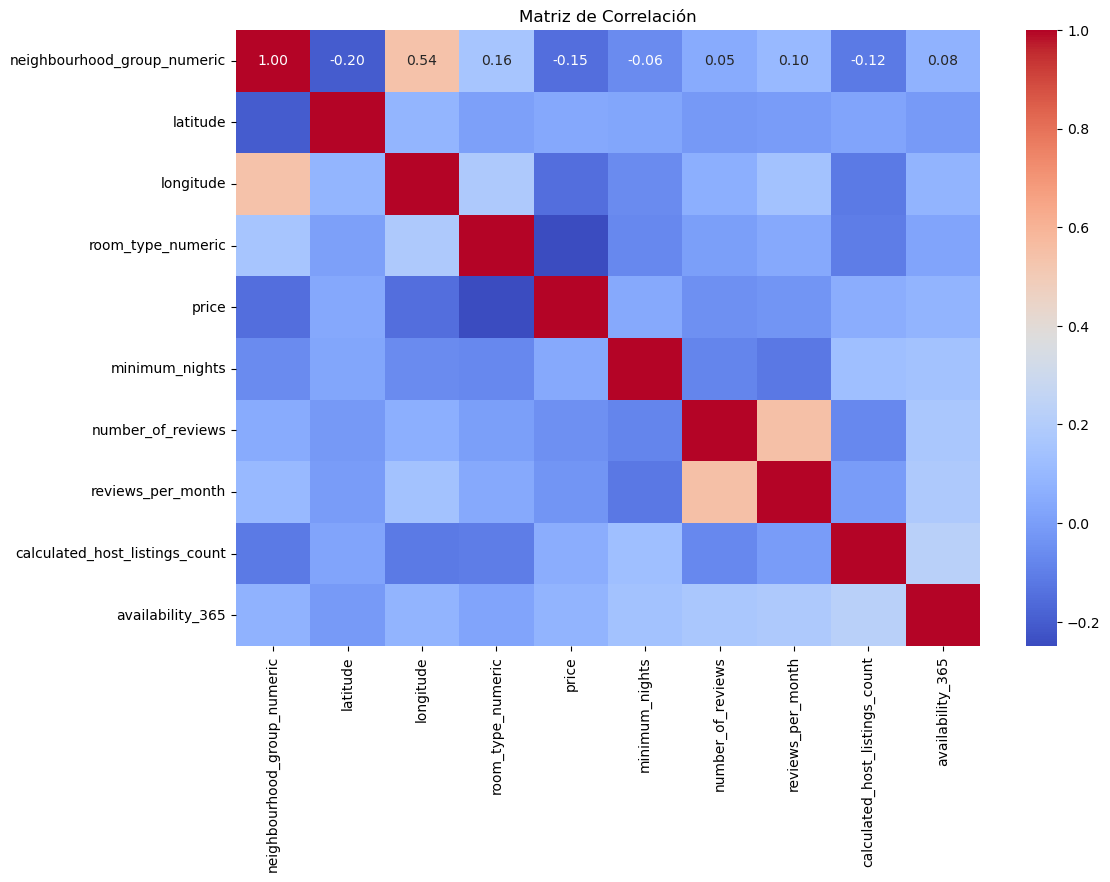

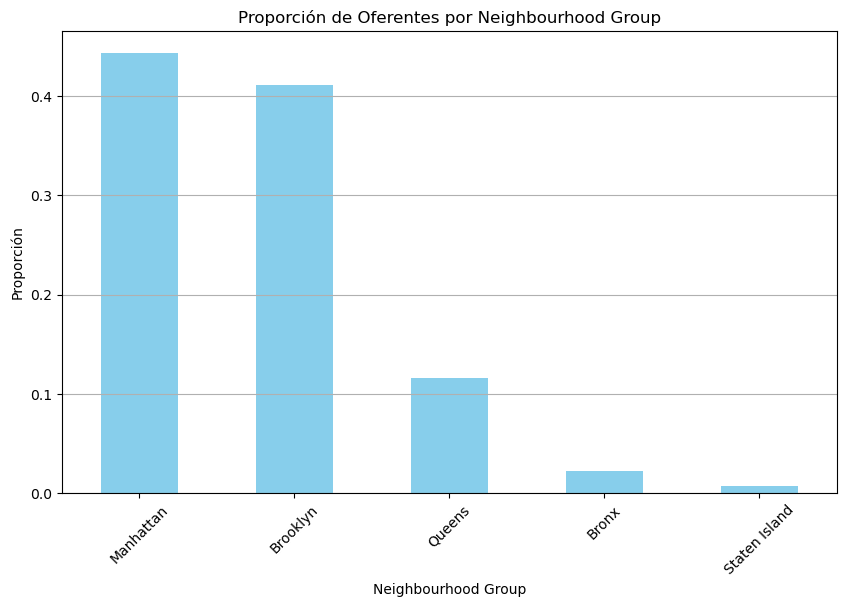

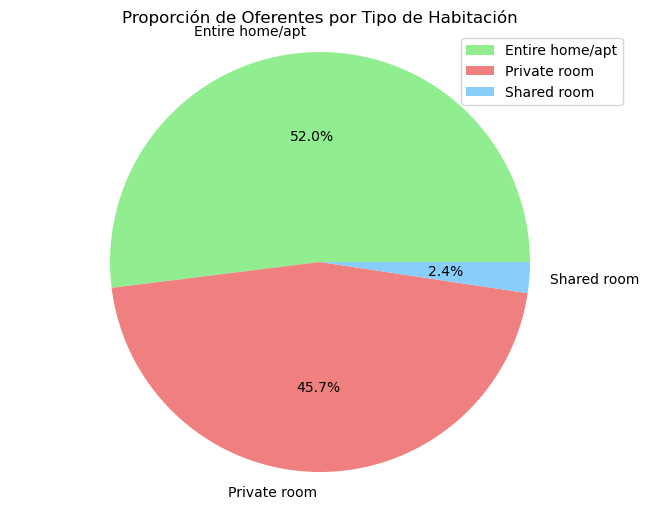

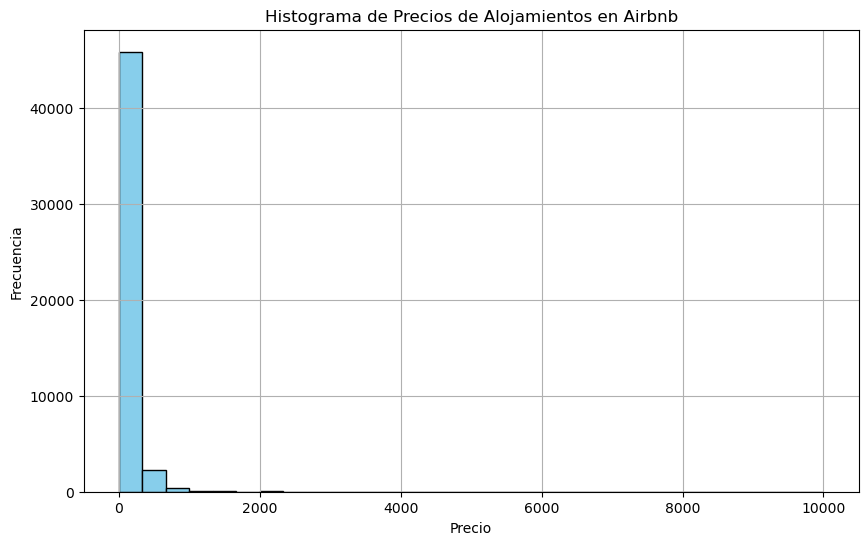

Precio Mínimo: $0.0
Precio Máximo: $10000.0
Precio Promedio: $152.73

Media de Precio por Neighbourhood Group:
neighbourhood_group
Bronx             87.464646
Brooklyn         124.380597
Manhattan        196.862352
Queens            99.536900
Staten Island    114.812332
Name: price, dtype: float64

Media de Precio por Tipo de Habitación:
room_type
Entire home/apt    211.788107
Private room        89.783388
Shared room         70.127586
Name: price, dtype: float64


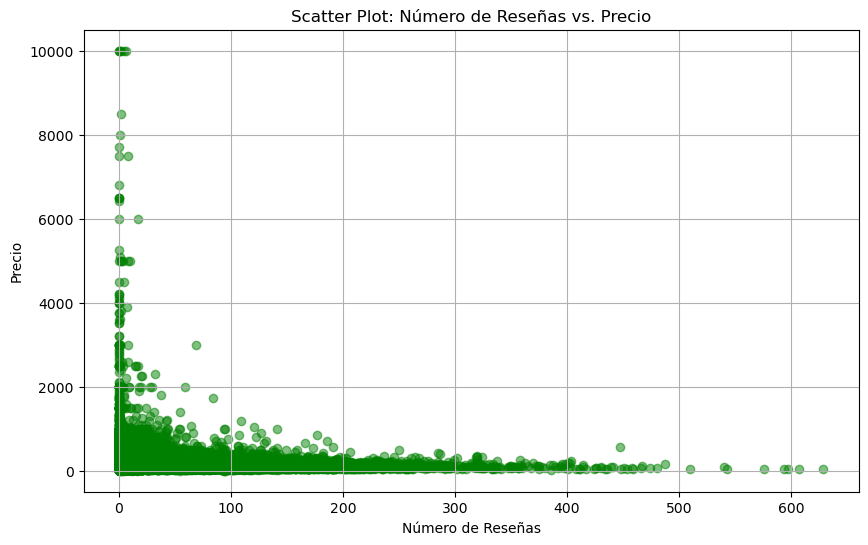

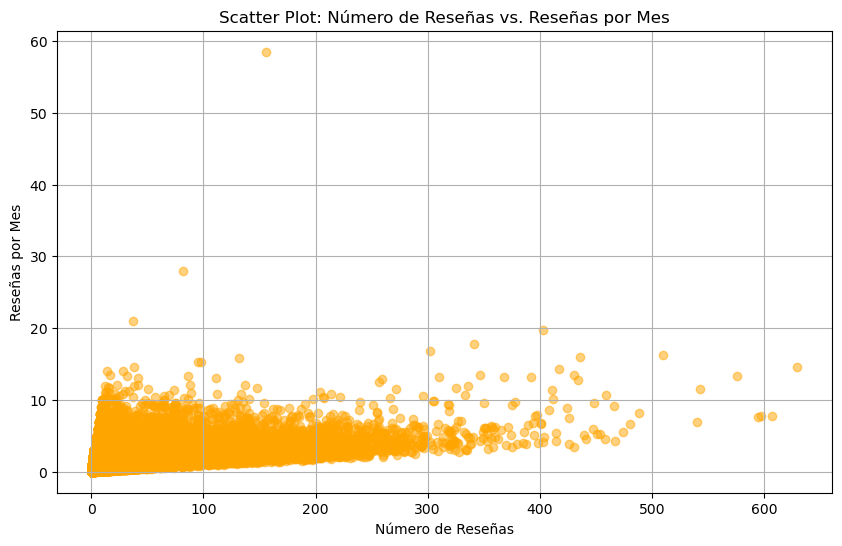

In [6]:
#1. 
import seaborn as sns
import matplotlib.pyplot as plt

# Selecciona las variables de interés del DataFrame
variables = ['neighbourhood_group_numeric', 'latitude', 'longitude', 'room_type_numeric', 
             'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
             'calculated_host_listings_count', 'availability_365']

# Crea un nuevo DataFrame con estas variables
df_subset = data_frame[variables]

# Calcula la matriz de correlación
correlation_matrix = df_subset.corr()

# Visualiza la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()
#2.
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la proporción de oferentes por "Neighbourhood group"
proporcion_neighbourhood = data_frame['neighbourhood_group'].value_counts(normalize=True)

# Calcular la proporción de oferentes por tipo de habitación
proporcion_room_type = data_frame['room_type'].value_counts(normalize=True)

# Gráfico para mostrar la proporción de oferentes por "Neighbourhood group"
plt.figure(figsize=(10, 6))
proporcion_neighbourhood.plot(kind='bar', color='skyblue')
plt.title('Proporción de Oferentes por Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Proporción')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Gráfico para mostrar la proporción de oferentes por tipo de habitación
plt.figure(figsize=(8, 6))
proporcion_room_type.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Proporción de Oferentes por Tipo de Habitación')
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc='upper right')
plt.show()

#3. 
import matplotlib.pyplot as plt

# Histograma de los precios de los alojamientos
plt.figure(figsize=(10, 6))
plt.hist(data_frame['price'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios de Alojamientos en Airbnb')
plt.grid(True)
plt.show()

# Calcular el precio mínimo, máximo, promedio y la media de precio por "Neighbourhood group" y por tipo de habitación
precio_minimo = data_frame['price'].min()
precio_maximo = data_frame['price'].max()
precio_promedio = data_frame['price'].mean()
media_precio_neighbourhood = data_frame.groupby('neighbourhood_group')['price'].mean()
media_precio_room_type = data_frame.groupby('room_type')['price'].mean()

# Imprimir los resultados
print(f"Precio Mínimo: ${precio_minimo}")
print(f"Precio Máximo: ${precio_maximo}")
print(f"Precio Promedio: ${precio_promedio:.2f}")
print("\nMedia de Precio por Neighbourhood Group:")
print(media_precio_neighbourhood)
print("\nMedia de Precio por Tipo de Habitación:")
print(media_precio_room_type)

#4.
import matplotlib.pyplot as plt

# Scatter plot 1: price vs. number_of_reviews
plt.figure(figsize=(10, 6))
plt.scatter(data_frame['number_of_reviews'], data_frame['price'], color='green', alpha=0.5)
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio')
plt.title('Scatter Plot: Número de Reseñas vs. Precio')
plt.grid(True)
plt.show()
# Scatter plot 2: number_of_reviews vs. reviews_per_month
plt.figure(figsize=(10, 6))
plt.scatter(data_frame['number_of_reviews'], data_frame['reviews_per_month'], color='orange', alpha=0.5)
plt.xlabel('Número de Reseñas')
plt.ylabel('Reseñas por Mes')
plt.title('Scatter Plot: Número de Reseñas vs. Reseñas por Mes')
plt.grid(True)
plt.show()


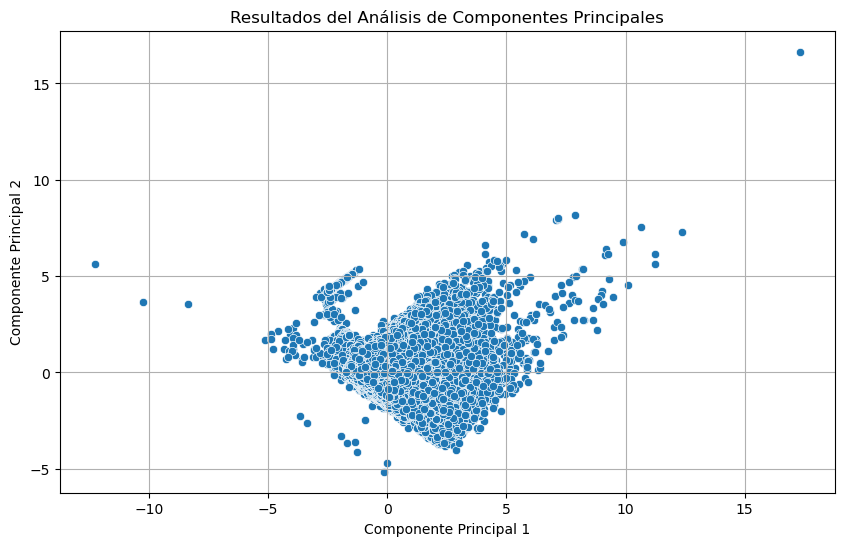

Varianza explicada por el Componente Principal 1: 0.21
Varianza explicada por el Componente Principal 2: 0.16


In [7]:
#5. 
from sklearn.decomposition import PCA
import seaborn as sns

# Seleccionar las variables numéricas relevantes para el PCA
variables_numericas = ['neighbourhood_group_numeric', 'latitude', 'longitude', 'room_type_numeric', 'price', 
                       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                       'calculated_host_listings_count', 'availability_365']

# Eliminar filas con valores NaN si es necesario
data_frame_pca = data_frame[variables_numericas].dropna()

# Separar las variables predictoras (X) y la variable objetivo (y) si es necesario
X = data_frame_pca.drop('price', axis=1)

# Normalizar los datos para que tengan media cero y varianza unitaria
X_scaled = (X - X.mean()) / X.std()

# Inicializar y ajustar el modelo PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transformar los datos en dos dimensiones
X_pca = pca.transform(X_scaled)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=X_pca, columns=['Componente Principal 1', 'Componente Principal 2'])

# Visualizar los resultados del PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', data=df_pca)
plt.title('Resultados del Análisis de Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Imprimir la proporción de varianza explicada por los dos primeros componentes principales
print(f"Varianza explicada por el Componente Principal 1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Varianza explicada por el Componente Principal 2: {pca.explained_variance_ratio_[1]:.2f}")


# **Parte III: Prediccion**

In [24]:
#1. Eliminar la columna 'price' del DataFrame
variables_sin_precio = data_frame.drop(columns=['price'])

#2. Partir la base en una base de prueba (test) y una de entrenamiento (train)
X_train, X_test, y_train, y_test = train_test_split(variables_sin_precio, 
                                                    data_frame['price'], 
                                                    test_size=0.3, 
                                                    random_state=201)

# Agregar columna de unos a las variables independientes
X_train['intercept'] = 1
X_test['intercept'] = 1

#3. 
data_frame_clean = data_frame.drop(columns=['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'])
data_frame_clean = data_frame.dropna()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Eliminar las columnas 'neighbourhood_group', 'neighbourhood', 'room_type' y 'last_review'
data_frame_clean = data_frame.drop(columns=['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'])

# Eliminar filas con valores faltantes
data_frame_clean = data_frame_clean.dropna()

# Dividir la base en una base de entrenamiento y una de prueba
X_train, X_test, y_train, y_test = train_test_split(data_frame_clean.drop(columns=['price']), 
                                                    data_frame_clean['price'], 
                                                    test_size=0.3, 
                                                    random_state=201)

# Agregar columna de unos a las variables independientes
X_train['intercept'] = 1
X_test['intercept'] = 1

# Crear el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train, y_train)

# Predecir los precios utilizando el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)
# Mostrar los coeficientes de la regresión lineal
print("Coeficientes de la regresión lineal:")
for coef, feature in zip(modelo_regresion.coef_, X_train.columns):
    print(feature, ':', coef)

# Mostrar el intercepto
print("Intercepto:", modelo_regresion.intercept_)


Error cuadrático medio: 35546.45939417794
Coeficientes de la regresión lineal:
id : 9.178188730088367e-08
host_id : 5.514814396171545e-08
latitude : 42.768631442708546
longitude : -375.3064802513575
minimum_nights : -0.08867355771413755
number_of_reviews : -0.13866926016089587
reviews_per_month : -1.8064718411986405
calculated_host_listings_count : -0.04767526260764126
availability_365 : 0.1683408908816846
neighbourhood_group_numeric : -35.33716364733415
room_type_numeric : -94.28925065828646
offer_group : -0.0027578839788956963
intercept : 0.0
Intercepto: -29116.631809482544
